# Visual Odometry for Localization in Autonomous Driving

Visual Features - Detection, Description and Matching. In this assignment, you will practice using the material you have learned to estimate an autonomous vehicle trajectory by images taken with a monocular camera set up on the vehicle.


**In this assignment, you will:**
- Extract  features from the photographs  taken with a camera setup on the vehicle.
- Use the extracted features to find matches between the features in different photographs.
- Use the found matches to estimate the camera motion between subsequent photographs. 
- Use the estimated camera motion to build the vehicle trajectory.

In [93]:
import sys

import numpy as np
import cv2
from matplotlib import pyplot as plt
from m2bk import *

%matplotlib widget
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

np.random.seed(1)
np.set_printoptions(threshold=sys.maxsize)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0 - Loading and Visualizing the Data
A convenient dataset handler class to read and iterate through samples taken from the CARLA simulator. Run the following code to create a dataset handler object. 

In [56]:
dataset_handler = DatasetHandler()

The dataset handler contains 52 data frames. Each frame contains an RGB image and a depth map taken with a setup on the vehicle and a grayscale version of the RGB image which will be used for computation. Furthermore, camera calibration matrix K is also provided in the dataset handler.

Upon creation of the dataset handler object, all the frames will be automatically read and loaded. The frame content can be accessed by using `images`, `images_rgb`, `depth_maps` attributes of the dataset handler object along with the index of the requested frame. See how to access the images (grayscale), rgb images (3-channel color), depth maps and camera calibration matrix in the example below.

데이터셋 핸들러는 52개의 데이터 프레임을 포함하고 있습니다. 각 프레임은 차량에 설치된 장비로 촬영된 RGB 이미지와 깊이 맵, 그리고 계산에 사용될 RGB 이미지의 그레이스케일 버전을 포함하고 있습니다. 또한, 데이터셋 핸들러에는 카메라 보정 행렬 K도 제공됩니다.

데이터셋 핸들러 객체가 생성되면 모든 프레임이 자동으로 읽히고 로드됩니다. 프레임의 내용을 접근하려면 요청한 프레임의 인덱스와 함께 데이터셋 핸들러 객체의 images, images_rgb, depth_maps 속성을 사용하면 됩니다. 아래 예제에서 그레이스케일 이미지, RGB 이미지(3채널 컬러), 깊이 맵 및 카메라 보정 행렬에 접근하는 방법을 확인하세요.

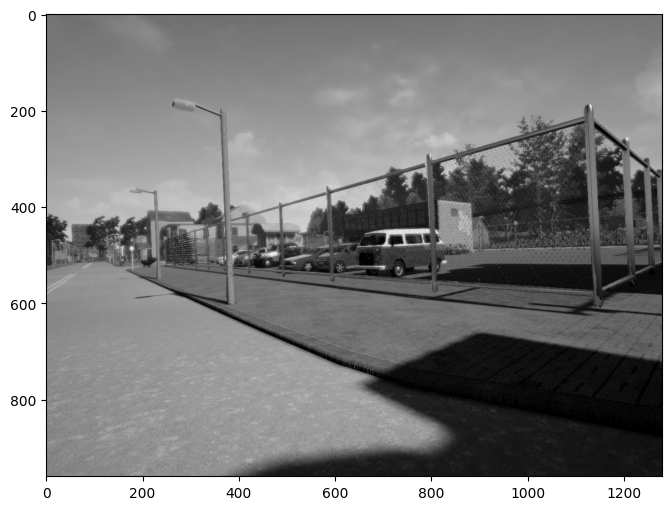

In [57]:
image = dataset_handler.images[30]

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(image, cmap='gray')

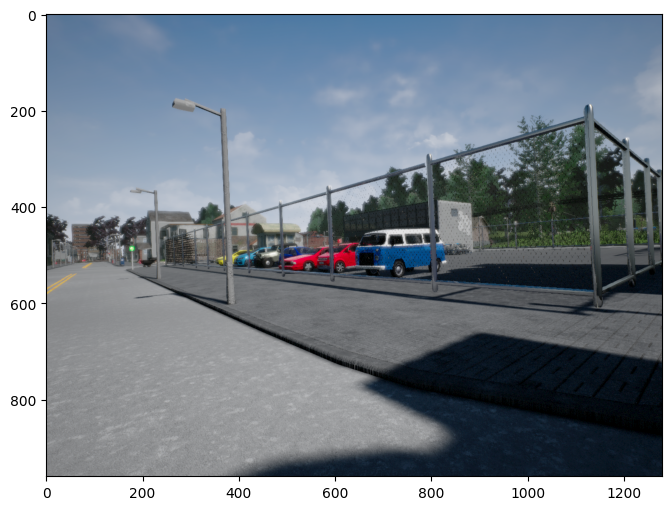

In [58]:
image_rgb = dataset_handler.images_rgb[30]

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(image_rgb)

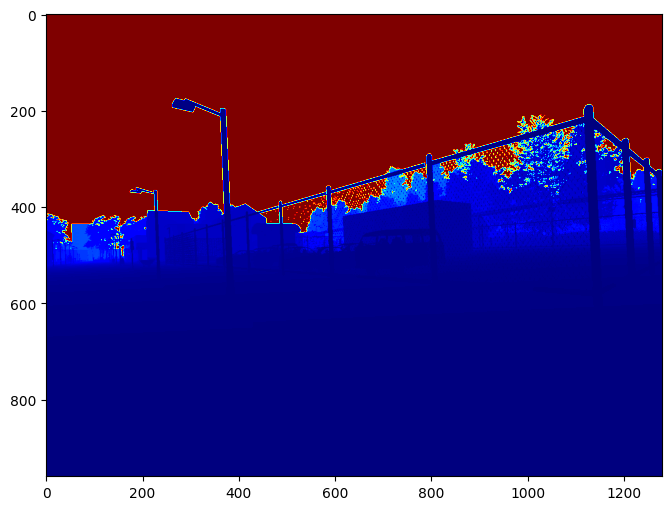

In [59]:
i = 30
depth = dataset_handler.depth_maps[i]

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(depth, cmap='jet')

In [60]:
dataset_handler.k

array([[640.,   0., 640.],
       [  0., 480., 480.],
       [  0.,   0.,   1.]], dtype=float32)

In order to access an arbitrary frame use image index, as shown in the examples below. Make sure the indexes are within the number of frames in the dataset. The number of frames in the dataset can be accessed with num_frames attribute.

In [61]:
# Number of frames in the dataset
print(dataset_handler.num_frames)

52


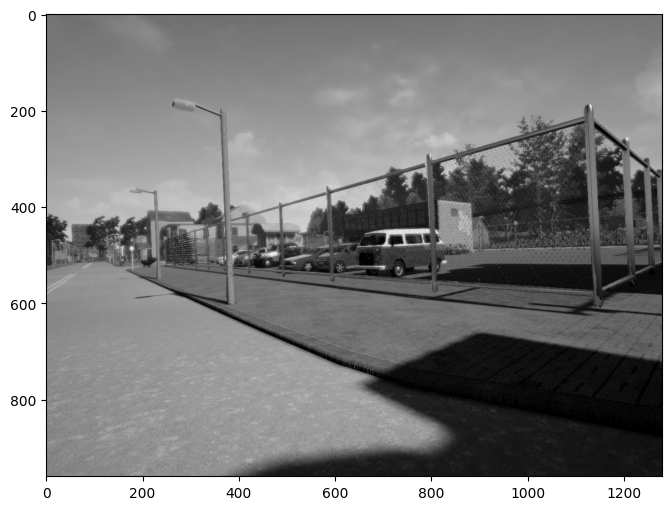

In [62]:
i = 30
image = dataset_handler.images[i]

plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(image, cmap='gray')

## 1 - Feature Extraction

### 1.1 - Extracting Features from an Image

**Task**: Implement feature extraction from a single image. You can use any feature descriptor of your choice. 

***Optional***: Try to extract features with different descriptors such as SIFT, ORB, SURF and BRIEF. You can also try using detectors such as Harris corners or FAST and pairing them with a descriptor. Lastly, try changing parameters of the algorithms. Do you see the difference in various approaches?
You might find this link useful:  [OpenCV:Feature Detection and Description](https://docs.opencv.org/3.4.3/db/d27/tutorial_py_table_of_contents_feature2d.html). 

1 - 특징 추출
1.1 - 이미지에서 특징 추출
과제: 단일 이미지에서 특징을 추출하는 기능을 구현하세요. 원하는 특징 기술자를 아무 것이나 사용할 수 있습니다.

선택 사항: SIFT, ORB, SURF, BRIEF와 같은 다양한 기술자를 사용하여 특징을 추출해 보세요. 또한 Harris 코너나 FAST와 같은 검출기를 사용하고 이를 기술자와 결합해 보세요. 마지막으로 알고리즘의 매개변수를 변경해 보세요. 다양한 접근 방식에서 차이를 느낄 수 있나요? 유용할 수 있는 링크: OpenCV: Feature Detection and Description.

In [ ]:
import cv2

def extract_features(image):
    """
    이미지에서 키포인트와 디스크립터를 추출합니다.

    매개변수:
    image -- 그레이스케일 이미지

    반환값:
    kp -- 이미지에서 추출된 키포인트(특징점) 목록
    des -- 이미지에서 추출된 키포인트 디스크립터 목록
    """
    
    orb = cv2.ORB_create()
    
    
    kp, des = orb.detectAndCompute(image, None)
    
    
    return kp, des


In [64]:
i = 1
image = dataset_handler.images[i]
kp, des = extract_features(image)
print("Number of features detected in frame {0}: {1}\n".format(i, len(kp)))

print("Coordinates of the first keypoint in frame {0}: {1}".format(i, str(kp[0].pt)))

Number of features detected in frame 1: 500

Coordinates of the first keypoint in frame 1: (476.0, 487.0)


In [65]:
def visualize_features(image, kp):
    """
    Visualize extracted features in the image

    Arguments:
    image -- a grayscale image
    kp -- list of the extracted keypoints

    Returns:
    """
    display = cv2.drawKeypoints(image, kp, None)
    plt.imshow(display)

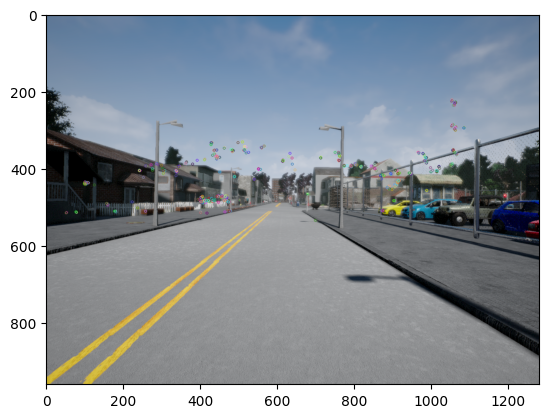

In [66]:
# Optional: visualizing and experimenting with various feature descriptors
i = 50
image = dataset_handler.images_rgb[i]

visualize_features(image, kp)

### 1.2 - Extracting Features from Each Image in the Dataset

**Task**: Implement feature extraction for each image in the dataset with the function you wrote in the above section. 

In [67]:
def extract_features_dataset(images, extract_features_function):
    """
    Find keypoints and descriptors for each image in the dataset

    Arguments:
    images -- a list of grayscale images
    extract_features_function -- a function which finds features (keypoints and descriptors) for an image

    Returns:
    kp_list -- a list of keypoints for each image in images
    des_list -- a list of descriptors for each image in images
    
    """
    kp_list = []
    des_list = []
    
    for image in images:
        kp, des = extract_features_function(image)
        kp_list.append(kp)
        des_list.append(des)

    
    return kp_list, des_list

In [68]:
images = dataset_handler.images
kp_list, des_list = extract_features_dataset(images, extract_features)

i = 5
print("Number of features detected in frame {0}: {1}".format(i, len(kp_list[i])))
print("Coordinates of the first keypoint in frame {0}: {1}\n".format(i, str(kp_list[i][0].pt)))

# Remember that the length of the returned by dataset_handler lists should be the same as the length of the image array
print("Length of images array: {0}".format(len(images)))

Number of features detected in frame 5: 500
Coordinates of the first keypoint in frame 5: (1092.0, 212.0)

Length of images array: 52


## 2 - Feature Matching

Next step after extracting the features in each image is matching the features from the subsequent frames. This is what is needed to be done in this section.

### 2.1 - Matching Features from a Pair of Subsequent Frames

**Task**: Implement feature matching for a pair of images. You can use any feature matching algorithm, Brute Force Matching or FLANN based Matching for example.

***Optional 1***: Implement match filtering by thresholding the distance between the best matches. This might be useful for improving your overall trajectory estimation results. Recall that you have an option of specifying the number best matches to be returned by the matcher.

2 - 특징 매칭 (Feature Matching)
이미지에서 특징을 추출한 후의 다음 단계는 연속적인 프레임 간의 특징을 매칭하는 것입니다. 이 섹션에서는 이를 수행해야 합니다.

2.1 - 연속 프레임 쌍에서 특징 매칭
작업: 두 이미지 쌍에서 특징 매칭을 구현하세요. Brute Force Matching 또는 FLANN 기반 매칭과 같은 알고리즘을 사용할 수 있습니다.

옵션 1: 가장 좋은 매칭의 거리로 임계값을 설정하여 매칭 결과를 필터링하는 방법을 구현하세요. 이는 전체 궤적 추정 결과를 개선하는 데 유용할 수 있습니다. 매칭기의 반환값으로 가장 좋은 매칭 결과의 개수를 지정할 수 있다는 점을 기억하세요.

In [ ]:
import cv2

def match_features(des1, des2):
    """
    두 이미지에서 추출된 디스크립터를 매칭합니다.

    매개변수:
    des1 -- 첫 번째 이미지에서 추출된 키포인트 디스크립터 목록
    des2 -- 두 번째 이미지에서 추출된 키포인트 디스크립터 목록

    반환값:
    match -- 두 이미지 간의 매칭된 특징점 목록.
             match[i]는 동일한 쿼리 디스크립터에 대해 k개 이하의 매칭을 포함.
    """
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    
    matches = bf.match(des1, des2)
    
    
    matches = sorted(matches, key=lambda x: x.distance)
    
    
    return matches

In [70]:
i = 0 
des1 = des_list[i]
des2 = des_list[i+1]

match = match_features(des1, des2)
print("Number of features matched in frames {0} and {1}: {2}".format(i, i+1, len(match)))

# Remember that a matcher finds the best matches for EACH descriptor from a query set

Number of features matched in frames 0 and 1: 332


In [71]:
# Optional
def filter_matches_distance(match, dist_threshold):
    """
    Filter matched features from two images by distance between the best matches

    Arguments:
    match -- list of matched features from two images
    dist_threshold -- maximum allowed relative distance between the best matches, (0.0, 1.0) 

    Returns:
    filtered_match -- list of good matches, satisfying the distance threshold
    """
    filtered_match = []
    
    ### START CODE HERE ###
    # Calculate the minimum distance among the matches
    min_dist = min(m.distance for m in match)

    # Filter matches based on distance threshold
    for m in match:
        if m.distance <= dist_threshold * min_dist:
            filtered_match.append(m)

    
    ### END CODE HERE ###

    return filtered_match

In [72]:
# Optional
i = 0 
des1 = des_list[i]
des2 = des_list[i+1]
match = match_features(des1, des2)

dist_threshold = 10
filtered_match = filter_matches_distance(match, dist_threshold)

print("Number of features matched in frames {0} and {1} after filtering by distance: {2}".format(i, i+1, len(filtered_match)))

Number of features matched in frames 0 and 1 after filtering by distance: 307


In [73]:
def visualize_matches(image1, kp1, image2, kp2, match):
    """
    Visualize corresponding matches in two images

    Arguments:
    image1 -- the first image in a matched image pair
    kp1 -- list of the keypoints in the first image
    image2 -- the second image in a matched image pair
    kp2 -- list of the keypoints in the second image
    match -- list of matched features from the pair of images

    Returns:
    image_matches -- an image showing the corresponding matches on both image1 and image2 or None if you don't use this function
    """
    image_matches = cv2.drawMatches(image1, kp1, image2, kp2, match, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(16, 6), dpi=100)
    plt.imshow(image_matches)

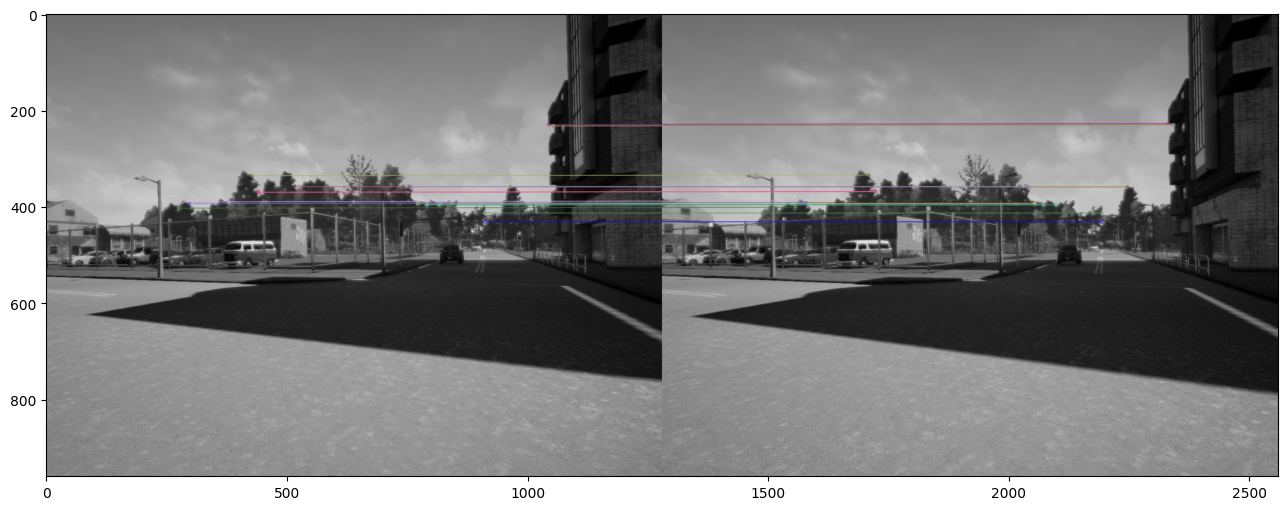

In [74]:
# Visualize n first matches, set n to None to view all matches
# set filtering to True if using match filtering, otherwise set to False
n = 20
filtering = False

i = 0 
image1 = dataset_handler.images[i]
image2 = dataset_handler.images[i+1]

kp1 = kp_list[i]
kp2 = kp_list[i+1]

des1 = des_list[i]
des2 = des_list[i+1]

match = match_features(des1, des2)
if filtering:
    dist_threshold = 10
    match = filter_matches_distance(match, dist_threshold)

image_matches = visualize_matches(image1, kp1, image2, kp2, match[:n])    

### 2.2 - Matching Features in Each Subsequent Image Pair in the Dataset

**Task**: Implement feature matching for each subsequent image pair in the dataset with the function you wrote in the above section.

***Optional***: Implement match filtering by thresholding the distance for each subsequent image pair in the dataset with the function you wrote in the above section.

In [75]:
def match_features_dataset(des_list, match_features):
    """
    Match features for each subsequent image pair in the dataset

    Arguments:
    des_list -- a list of descriptors for each image in the dataset
    match_features -- a function which maches features between a pair of images

    Returns:
    matches -- list of matches for each subsequent image pair in the dataset. 
               Each matches[i] is a list of matched features from images i and i + 1
               
    """
    matches = []
    
    ### START CODE HERE ###
    for i in range(len(des_list) - 1):
        match = match_features(des_list[i], des_list[i + 1])
        matches.append(match)

    
    ### END CODE HERE ###
    
    return matches

In [76]:
matches = match_features_dataset(des_list, match_features)

i = 5
print("Number of features matched in frames {0} and {1}: {2}".format(i, i+1, len(matches[i])))

Number of features matched in frames 5 and 6: 331


In [77]:
# Optional
def filter_matches_dataset(filter_matches_distance, matches, dist_threshold):
    """
    Filter matched features by distance for each subsequent image pair in the dataset

    Arguments:
    filter_matches_distance -- a function which filters matched features from two images by distance between the best matches
    matches -- list of matches for each subsequent image pair in the dataset. 
               Each matches[i] is a list of matched features from images i and i + 1
    dist_threshold -- maximum allowed relative distance between the best matches, (0.0, 1.0) 

    Returns:
    filtered_matches -- list of good matches for each subsequent image pair in the dataset. 
                        Each matches[i] is a list of good matches, satisfying the distance threshold
               
    """
    filtered_matches = []
    
    ### START CODE HERE ###
    # Iterate through each list of matches for subsequent image pairs
    for match in matches:
        # Apply the filter_matches_distance function to filter matches based on distance threshold
        good_matches = filter_matches_distance(match, dist_threshold)
        filtered_matches.append(good_matches)
    
    ### END CODE HERE ###
    
    return filtered_matches

In [78]:
# Optional
dist_threshold = 10

filtered_matches = filter_matches_dataset(filter_matches_distance, matches, dist_threshold)

if len(filtered_matches) > 0:
    
    # Make sure that this variable is set to True if you want to use filtered matches further in your assignment
    is_main_filtered_m = False
    if is_main_filtered_m: 
        matches = filtered_matches

    i = 0
    print("Number of filtered matches in frames {0} and {1}: {2}".format(i, i+1, len(filtered_matches[i])))

Number of filtered matches in frames 0 and 1: 307


## 3 - Trajectory Estimation

At this point you have everything to perform visual odometry for the autonomous vehicle. In this section you will incrementally estimate the pose of the vehicle by examining the changes that motion induces on the images of its onboard camera.

### 3.1 - Estimating Camera Motion between a Pair of Images

**Task**: Implement camera motion estimation from a pair of images. You can use the motion estimation algorithm, such as Perspective-n-Point (PnP), as well as Essential Matrix Decomposition.

- If you decide to use PnP, you will need depth maps of frame and they are provided with the dataset handler. 
- Here, we decide to use Essential Matrix Decomposition, more information about this method can be found in [Wikipedia: Determining R and t from E](https://en.wikipedia.org/wiki/Essential_matrix).
- When you derive R,t, use the open-cv function such as cv2.findEssentialMat and cv2.recoverPose.
- In cv2.findEssentialMat, set the method=cv2.RANSAC, prob = 0.999, and threshold=1.0.

3 - 궤적 추정 (Trajectory Estimation)
이제 자율 주행 차량의 비주얼 오도메트리(Visual Odometry)를 수행하기 위한 모든 준비가 완료되었습니다. 이 섹션에서는 온보드 카메라의 이미지에서 발생하는 변화를 분석하여 차량의 자세(pose)를 점진적으로 추정합니다.

3.1 - 이미지 쌍 간의 카메라 이동 추정
작업: 이미지 쌍에서 카메라 이동(camera motion) 추정을 구현하세요. Perspective-n-Point (PnP) 또는 Essential Matrix Decomposition과 같은 이동 추정 알고리즘을 사용할 수 있습니다.

PnP를 사용할 경우: 프레임의 깊이 맵(depth map)이 필요하며, 이는 데이터셋 핸들러에서 제공됩니다.
Essential Matrix Decomposition을 사용할 경우: 이 방법에 대한 더 많은 정보는 Wikipedia: Determining R and t from E에서 확인할 수 있습니다.
R(회전 행렬)과 t(평행 이동 벡터)를 도출할 때, OpenCV의 cv2.findEssentialMat 및 cv2.recoverPose와 같은 함수를 사용하세요.
cv2.findEssentialMat 함수에서 다음 매개변수를 설정하세요:
method=cv2.RANSAC
prob=0.999
threshold=1.0

In [79]:
def estimate_motion(match, kp1, kp2, k, depth1=None):
    """
    Estimate camera motion from a pair of subsequent image frames

    Arguments:
    match -- list of matched features from the pair of images
    kp1 -- list of the keypoints in the first image
    kp2 -- list of the keypoints in the second image
    k -- camera calibration matrix 
    
    Optional arguments:
    depth1 -- a depth map of the first frame. This argument is not needed if you use Essential Matrix Decomposition

    Returns:
    rmat -- recovered 3x3 rotation numpy matrix
    tvec -- recovered 3x1 translation numpy vector
    image1_points -- a list of selected match coordinates in the first image. image1_points[i] = [u, v], where u and v are 
                     coordinates of the i-th match in the image coordinate system
    image2_points -- a list of selected match coordinates in the second image. image1_points[i] = [u, v], where u and v are 
                     coordinates of the i-th match in the image coordinate system
               
    """
    rmat = np.eye(3)
    tvec = np.zeros((3, 1))
    image1_points = []
    image2_points = []
    
    ### START CODE HERE ###
    for m in match:
        image1_points.append(kp1[m.queryIdx].pt)
        image2_points.append(kp2[m.trainIdx].pt)

    image1_points = np.array(image1_points, dtype=np.float32)
    image2_points = np.array(image2_points, dtype=np.float32)
    
    
    # Estimate the Essential matrix
    essential_matrix, _ = cv2.findEssentialMat(image1_points, image2_points, k, method=cv2.RANSAC, prob=0.999, threshold=1.0)
    
    # Decompose the Essential matrix to obtain rotation and translation
    _, rmat, tvec, _ = cv2.recoverPose(essential_matrix, image1_points, image2_points, k)
    
    ### END CODE HERE ###
    
    return rmat, tvec, image1_points, image2_points

In [80]:
i = 0
match = matches[i]
kp1 = kp_list[i]
kp2 = kp_list[i+1]
k = dataset_handler.k
depth = dataset_handler.depth_maps[i]

rmat, tvec, image1_points, image2_points = estimate_motion(match, kp1, kp2, k, depth1=depth)

print("Estimated rotation:\n {0}".format(rmat))
print("Estimated translation:\n {0}".format(tvec))

Estimated rotation:
 [[ 9.99976906e-01 -6.79126966e-03  2.57043082e-04]
 [ 6.79182610e-03  9.99974450e-01 -2.22965646e-03]
 [-2.41894316e-04  2.23135076e-03  9.99997481e-01]]
Estimated translation:
 [[ 0.24445339]
 [ 0.02824566]
 [-0.96924957]]


**Expected Output Format**:

Make sure that your estimated rotation matrix and translation vector are in the same format as the given initial values

```
rmat = np.eye(3)
tvec = np.zeros((3, 1))

print("Initial rotation:\n {0}".format(rmat))
print("Initial translation:\n {0}".format(tvec))
```


```
Initial rotation:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Initial translation:
 [[0.]
 [0.]
 [0.]]
```

**Camera Movement Visualization**:
You can use `visualize_camera_movement` that is provided to you. This function visualizes final image matches from an image pair connected with an arrow corresponding to direction of camera movement (when `is_show_img_after_mov = False`). The function description:
```
Arguments:
image1 -- the first image in a matched image pair (RGB or grayscale)
image1_points -- a list of selected match coordinates in the first image. image1_points[i] = [x, y], where x and y are 
                 coordinates of the i-th match in the image coordinate system
image2 -- the second image in a matched image pair (RGB or grayscale)
image2_points -- a list of selected match coordinates in the second image. image1_points[i] = [x, y], where x and y are 
                 coordinates of the i-th match in the image coordinate system
is_show_img_after_mov -- a boolean variable, controling the output (read image_move description for more info) 

Returns:
image_move -- an image with the visualization. When is_show_img_after_mov=False then the image points from both images are visualized on the first image. Otherwise, the image points from the second image only are visualized on the second image
```

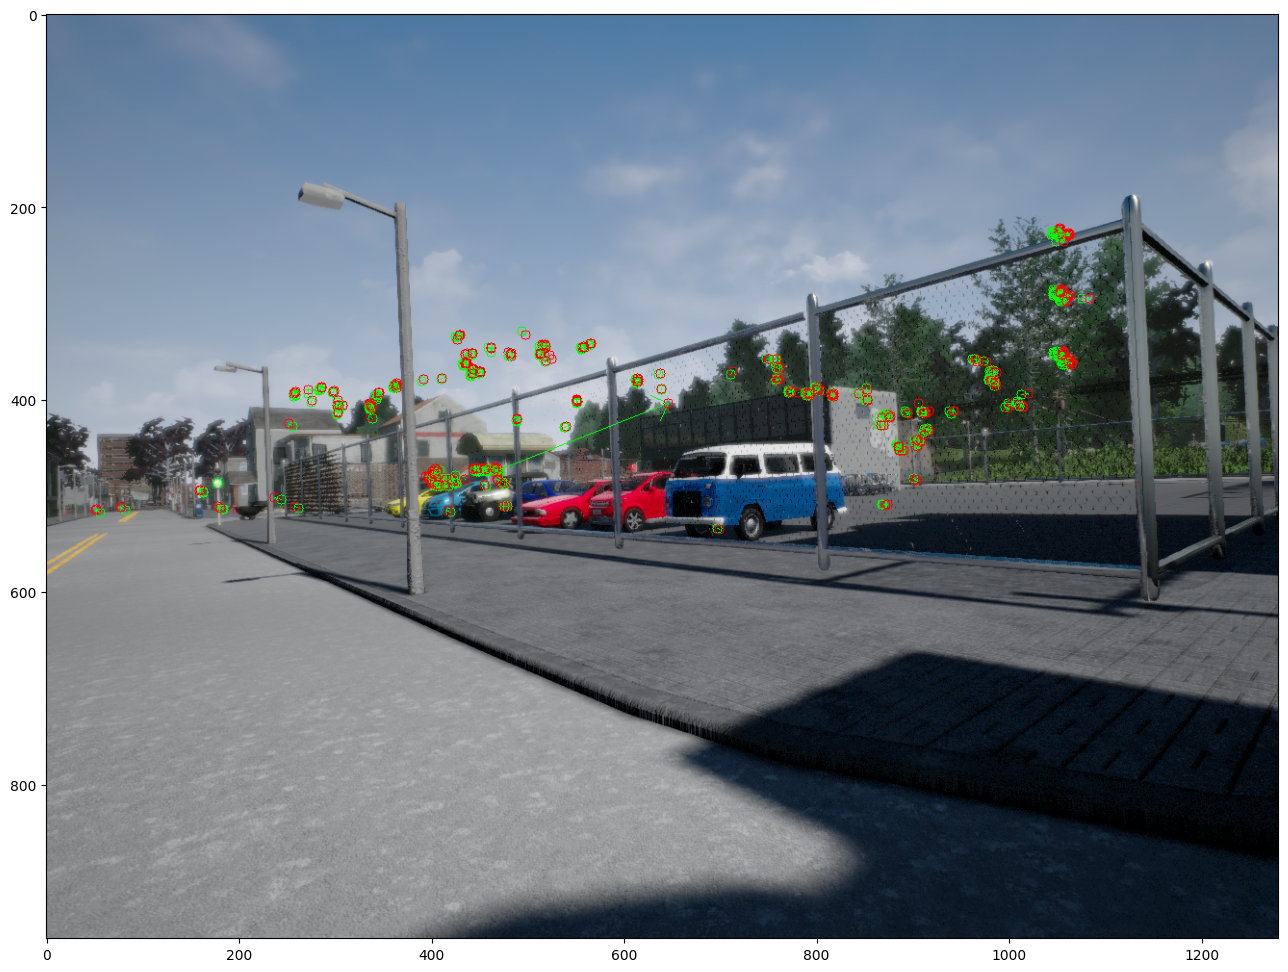

In [81]:
i=30
image1  = dataset_handler.images_rgb[i]
image2 = dataset_handler.images_rgb[i + 1]

image_move = visualize_camera_movement(image1, image1_points, image2, image2_points)
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(image_move)

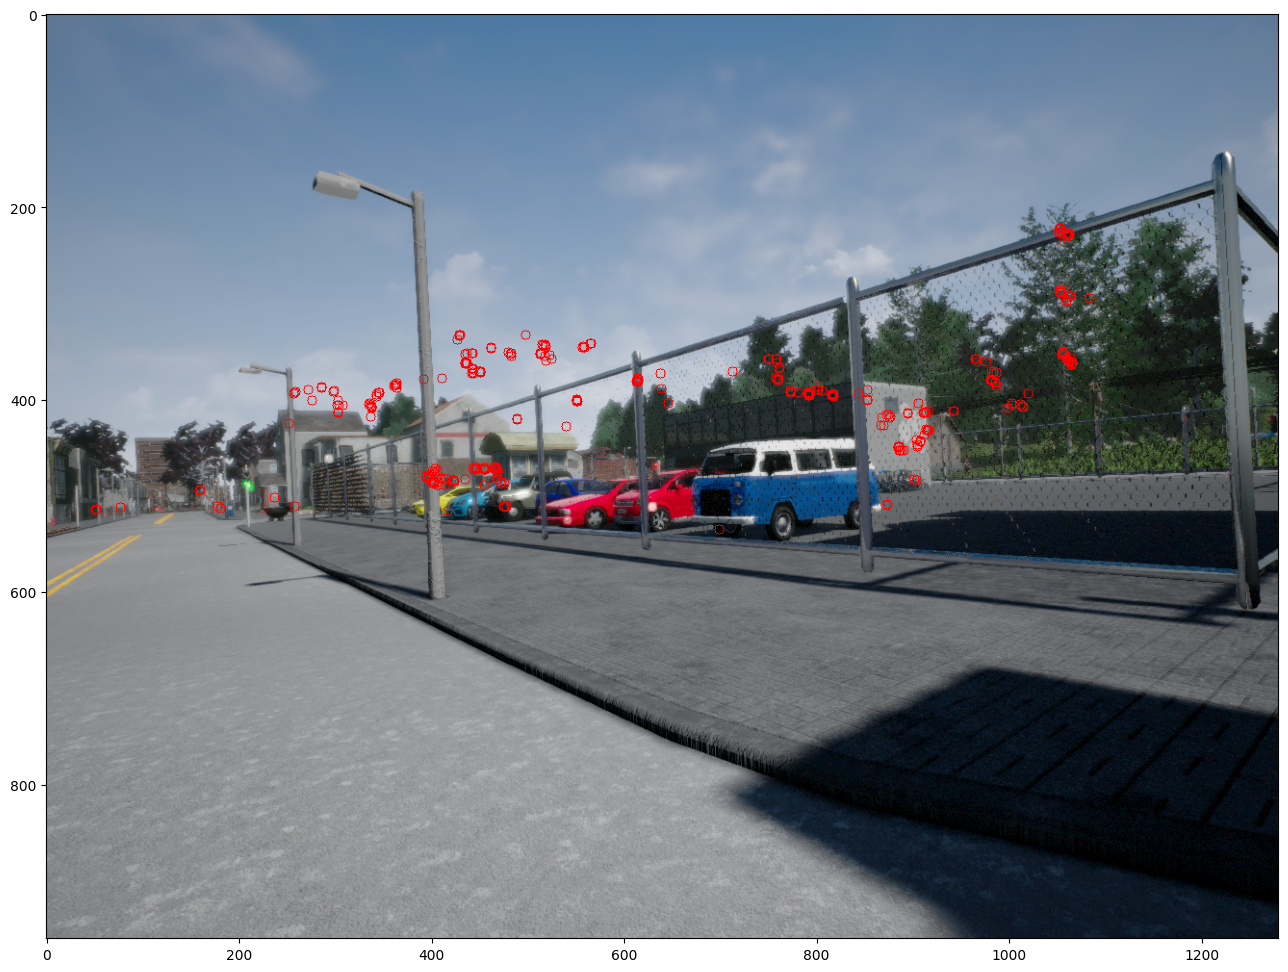

In [82]:
image_move = visualize_camera_movement(image1, image1_points, image2, image2_points, is_show_img_after_move=True)
plt.figure(figsize=(16, 12), dpi=100)
plt.imshow(image_move)
# These visualizations might be helpful for understanding the quality of image points selected for the camera motion estimation

### 3.2 - Camera Trajectory Estimation

**Task**: Implement camera trajectory estimation with visual odometry. More specifically, implement camera motion estimation for each subsequent image pair in the dataset with the function you wrote in the above section.

***Note***: Do not forget that the image pairs are not independent one to each other. i-th and (i + 1)-th image pairs have an image in common

In [83]:
def estimate_trajectory(estimate_motion, matches, kp_list, k, depth_maps=[]):
    """
    Estimate complete camera trajectory from subsequent image pairs

    Arguments:
    estimate_motion -- a function which estimates camera motion from a pair of subsequent image frames
    matches -- list of matches for each subsequent image pair in the dataset. 
               Each matches[i] is a list of matched features from images i and i + 1
    des_list -- a list of keypoints for each image in the dataset
    k -- camera calibration matrix 
    
    Optional arguments:
    depth_maps -- a list of depth maps for each frame. This argument is not needed if you use Essential Matrix Decomposition

    Returns:
    trajectory -- a 3xlen numpy array of the camera locations, where len is the lenght of the list of images and   
                  trajectory[:, i] is a 3x1 numpy vector, such as:
                  
                  trajectory[:, i][0] - is X coordinate of the i-th location
                  trajectory[:, i][1] - is Y coordinate of the i-th location
                  trajectory[:, i][2] - is Z coordinate of the i-th location
                  
                  * Consider that the origin of your trajectory cordinate system is located at the camera position 
                  when the first image (the one with index 0) was taken. The first camera location (index = 0) is geven 
                  at the initialization of this function

    """
    trajectory = [np.zeros((3, 1))]  # Start with the origin point as a list element
    current_position = np.zeros((3, 1))  # Initial position at the origin
    
    ### START CODE HERE ###
    for i in range(len(matches)):
        
        # estimate the rmat, tvec
        kp1 = kp_list[i]
        kp2 = kp_list[i + 1]
        match = matches[i]      
        # Update current position by applying the rotation and translation
        rmat, tvec, _, _ = estimate_motion(match, kp1, kp2, k, depth_maps[i] if depth_maps else None)
        current_position = current_position + rmat @ tvec
        
        # 디버깅: 추정된 rmat, tvec 확인
        #print(f"Frame {i} -> Frame {i+1}")
        #print("Rotation Matrix (rmat):\n", rmat)
        #print("Translation Vector (tvec):\n", tvec)
        
        # Append the new position to the trajectory list
        trajectory.append(current_position)
    
    # Convert trajectory to a numpy array of shape (3, len)
    trajectory = np.hstack(trajectory)
        
        
    ### END CODE HERE ###
    
    return trajectory

In [84]:
depth_maps = dataset_handler.depth_maps
trajectory = estimate_trajectory(estimate_motion, matches, kp_list, k, depth_maps=depth_maps)

i = 1
print("Camera location in point {0} is: \n {1}\n".format(i, trajectory[:, [i]]))

# Remember that the length of the returned by trajectory should be the same as the length of the image array
print("Length of trajectory: {0}".format(trajectory.shape[1]))

Camera location in point 1 is: 
 [[ 0.24400678]
 [ 0.03206632]
 [-0.96924323]]

Length of trajectory: 52


**Expected Output**:

```
Camera location in point i is: 
 [[locXi]
 [locYi]
 [locZi]]```
 
 In this output: locXi, locYi, locZi are the coordinates of the corresponding i-th camera location

In [85]:
# Note: Make sure to uncomment the below line if you modified the original data in any ways
#dataset_handler = DatasetHandler()


# Part 1. Features Extraction
images = dataset_handler.images
kp_list, des_list = extract_features_dataset(images, extract_features)


# Part II. Feature Matching
matches = match_features_dataset(des_list, match_features)

# Set to True if you want to use filtered matches or False otherwise
is_main_filtered_m = True
if is_main_filtered_m:
    dist_threshold = 100
    filtered_matches = filter_matches_dataset(filter_matches_distance, matches, dist_threshold)
    matches = filtered_matches

    
# Part III. Trajectory Estimation
depth_maps = dataset_handler.depth_maps
trajectory = estimate_trajectory(estimate_motion, matches, kp_list, k, depth_maps=depth_maps)


#!!! Make sure you don't modify the output in any way
# Print Submission Info
print("Trajectory X:\n {0}".format(trajectory[0,:].reshape((1,-1))))
print("Trajectory Y:\n {0}".format(trajectory[1,:].reshape((1,-1))))
print("Trajectory Z:\n {0}".format(trajectory[2,:].reshape((1,-1))))

Trajectory X:
 [[ 0.          0.24400678 -0.10516347 -0.02554437 -0.21605329  0.03619766
   0.1665097  -0.17600125  0.05025214  0.12686547  0.19824869  0.26019115
   0.43600913  0.03623192 -0.19278423  0.03180598  0.27209827  0.43305707
   0.57146678  0.63444319  0.67939483  0.75145422  0.87400719  1.18317488
   1.12376843  1.42506992  1.92873051  1.78812365  1.84111706  2.27522795
   2.31902417  2.47461807  2.61800735  2.5750788   3.01453623  3.08844948
   3.47482432  3.80362485  3.91695458  4.33593581  4.45307543  4.80479367
   5.00138744  5.41566384  5.88352474  5.69391602  5.79486868  5.79019963
   5.68058581  6.58492129  7.05963926  7.60845586]]
Trajectory Y:
 [[ 0.          0.03206632 -0.00835486 -0.23251834 -0.40550449 -0.50091881
  -0.58245632 -0.47492323 -0.47759767 -0.62022772 -0.55499804 -0.49815787
  -0.54784985 -0.60342503  0.31500417  0.33465605  0.3357761   0.32775551
   0.35599672  0.36230669  0.35407455  0.37269118  0.38539857  0.32474678
   0.36398937  0.33359752  0.3

### Visualize your Results

**Important**:

- Make sure your results visualization is appealing before submitting your results.

In [88]:
import seaborn as sns
sns.set_style("whitegrid")  # Seaborn의 whitegrid 스타일을 설정



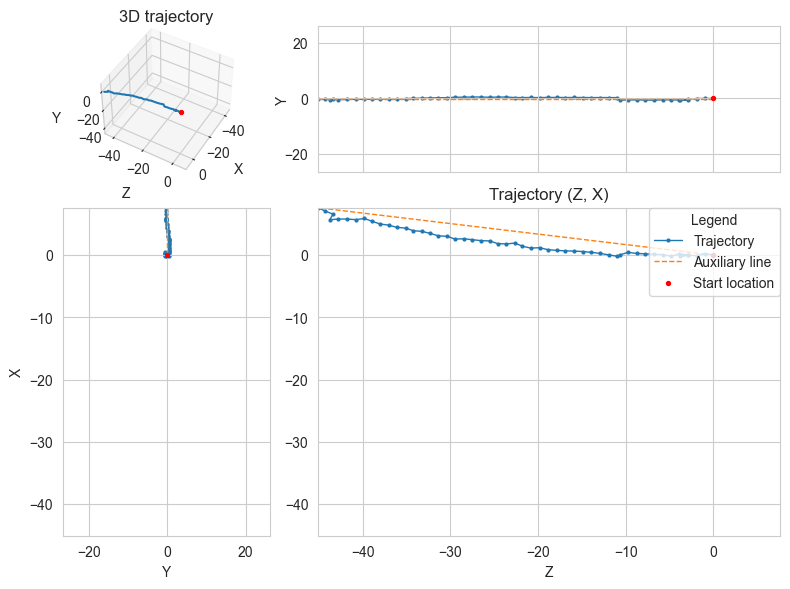

In [94]:
visualize_trajectory(trajectory)

Frame 0: [0. 0. 0.]
Frame 0: [0. 0. 0.]
Frame 1: [ 0.24400678  0.03206632 -0.96924323]
Frame 2: [-0.10516347 -0.00835486 -1.90543032]
Frame 3: [-0.02554437 -0.23251834 -2.87672406]
Frame 4: [-0.21605329 -0.40550449 -3.8430481 ]
Frame 5: [ 0.03619766 -0.50091881 -2.8801018 ]
Frame 6: [ 0.1665097  -0.58245632 -3.86821637]
Frame 7: [-0.17600125 -0.47492323 -4.80155601]
Frame 8: [ 0.05025214 -0.47759767 -5.77562082]
Frame 9: [ 0.12686547 -0.62022772 -6.76242732]
Frame 10: [ 0.19824869 -0.55499804 -7.7577411 ]
Frame 11: [ 0.26019115 -0.49815787 -8.754201  ]
Frame 12: [ 0.43600913 -0.54784985 -9.73736871]
Frame 13: [  0.03623192  -0.60342503 -10.65229471]
Frame 14: [ -0.19278423   0.31500417 -10.97484609]
Frame 15: [  0.03180598   0.33465605 -11.94910122]
Frame 16: [  0.27209827   0.3357761  -12.91980115]
Frame 17: [  0.43305707   0.32775551 -13.90672969]
Frame 18: [  0.57146678   0.35599672 -14.896702  ]
Frame 19: [  0.63444319   0.36230669 -15.89469707]
Frame 20: [  0.67939483   0.35407455

Frame 0: [0. 0. 0.]


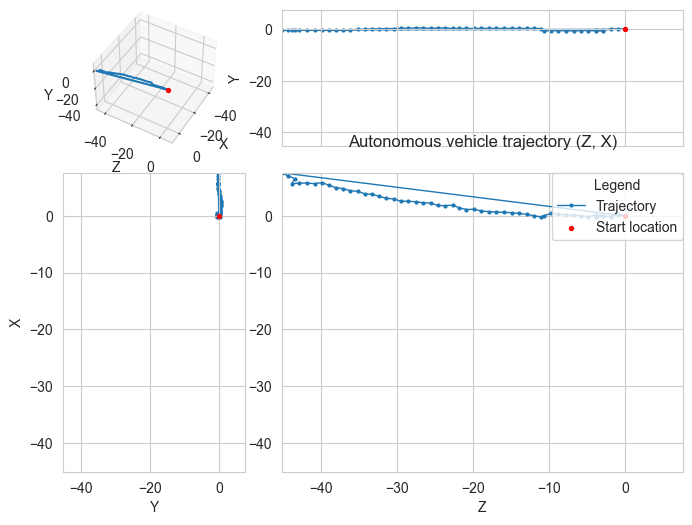

In [95]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

locX, locY, locZ = [], [], []

# Set up the figure
fig = plt.figure(figsize=(8, 6), dpi=100)
gspec = gridspec.GridSpec(3, 3)
ZY_plt = plt.subplot(gspec[0, 1:])
YX_plt = plt.subplot(gspec[1:, 0])
traj_main_plt = plt.subplot(gspec[1:, 1:])
D3_plt = plt.subplot(gspec[0, 0], projection='3d')

# Determine plot limits
max_value = np.max(trajectory)
min_value = np.min(trajectory)
maxY, minY = max_value, min_value

def animate(i):
    current_pos = trajectory[:, i]
    print(f"Frame {i}: {current_pos}")  # 프레임 번호와 현재 포지션 출력
    locX.append(current_pos[0])
    locY.append(current_pos[1])
    locZ.append(current_pos[2])

    traj_main_plt.clear()
    ZY_plt.clear()
    YX_plt.clear()
    D3_plt.clear()

    # Main trajectory plot (Z, X)
    traj_main_plt.set_title("Autonomous vehicle trajectory (Z, X)", y=1.06)
    traj_main_plt.plot(locZ, locX, ".-", label="Trajectory", zorder=1, linewidth=1, markersize=4)
    traj_main_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    traj_main_plt.set_xlim([min_value, max_value])
    traj_main_plt.set_ylim([min_value, max_value])
    traj_main_plt.set_xlabel("Z")
    traj_main_plt.legend(loc=1, title="Legend", borderaxespad=0., fontsize="medium", frameon=True)

    # ZY plot
    ZY_plt.plot(locZ, locY, ".-", linewidth=1, markersize=4, zorder=0)
    ZY_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    ZY_plt.set_xlim([min_value, max_value])
    ZY_plt.set_ylim([minY, maxY])
    ZY_plt.set_ylabel("Y")
    ZY_plt.axes.xaxis.set_ticklabels([])

    # YX plot
    YX_plt.plot(locY, locX, ".-", linewidth=1, markersize=4, zorder=0)
    YX_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    YX_plt.set_xlim([minY, maxY])
    YX_plt.set_ylim([min_value, max_value])
    YX_plt.set_xlabel("Y")
    YX_plt.set_ylabel("X")

    # 3D plot
    D3_plt.plot3D(locX, locZ, locY, zorder=0)
    D3_plt.scatter(0, 0, 0, s=8, c="red", zorder=1)
    D3_plt.set_xlim3d(min_value, max_value)
    D3_plt.set_ylim3d(min_value, max_value)
    D3_plt.set_zlim3d(min_value, max_value)
    D3_plt.set_xlabel("X", labelpad=0)
    D3_plt.set_ylabel("Z", labelpad=0)
    D3_plt.set_zlabel("Y", labelpad=-2)
    D3_plt.view_init(45, azim=30)

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=trajectory.shape[1], interval=100, repeat=True)
HTML(ani.to_jshtml())
# plt.tight_layout()
# plt.show()

Congrats on finishing this assignment! 